# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

from sklearn.datasets import make_classification

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

2022-08-13 21:31:29.930636: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-13 21:31:29.957568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-13 21:31:29.957605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X, y= sv.datasets.X_illustration, sv.datasets.y_illustration

## Illustrating all oversampling techniques

In this section, we illustrate the output of all oversampling techniques with default parameters on the ```iris0``` dataset.

In [6]:
oversamplers= sv.get_metric_learning_oversamplers()
#oversamplers = [sv.SMOTE, sv.ADASYN]

In [7]:
#X = X * np.array([100, 200, 150])
#X = X + np.array([1000, 2000, 1500])

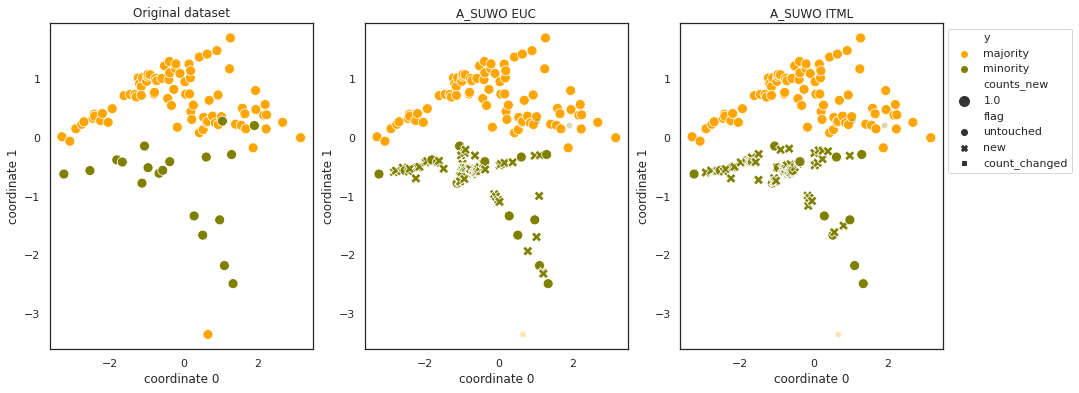

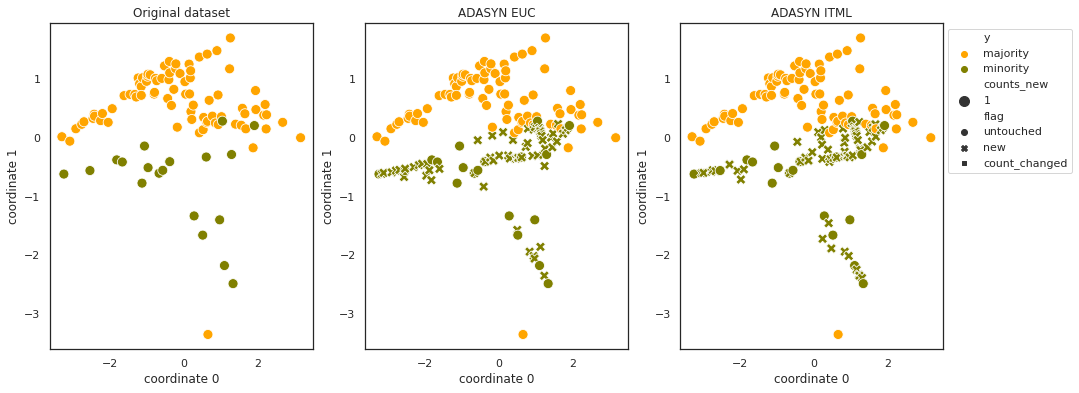

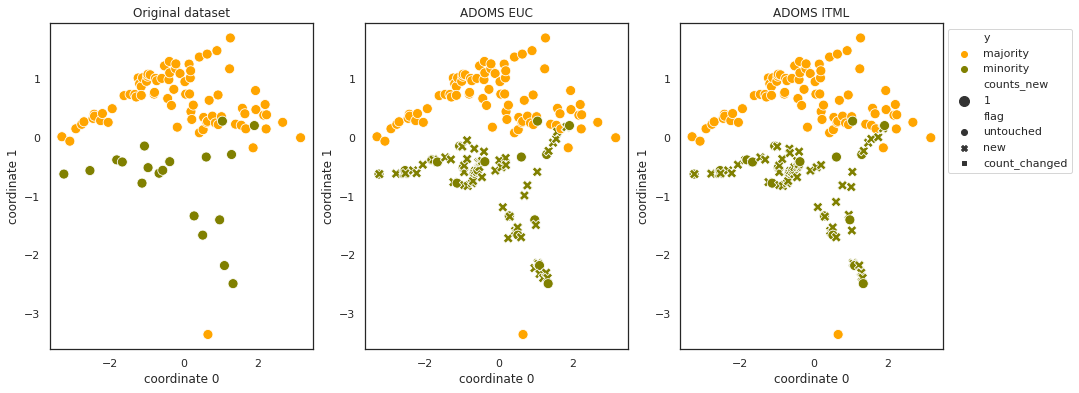

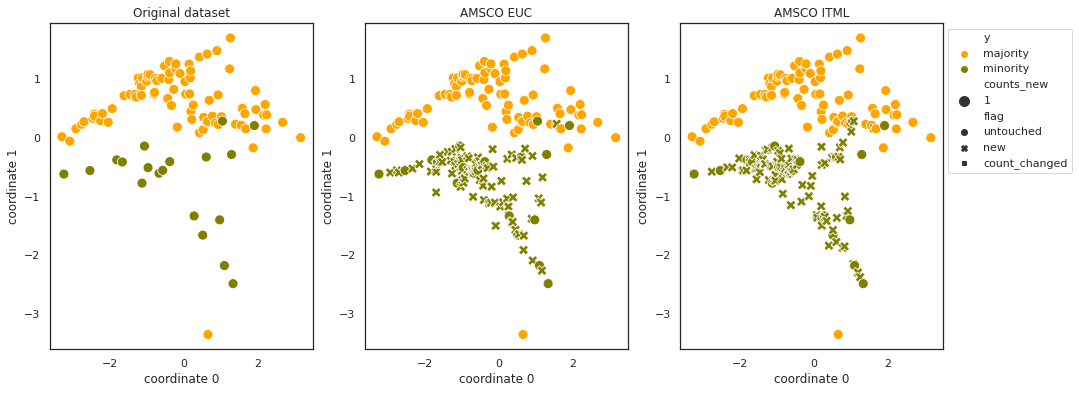

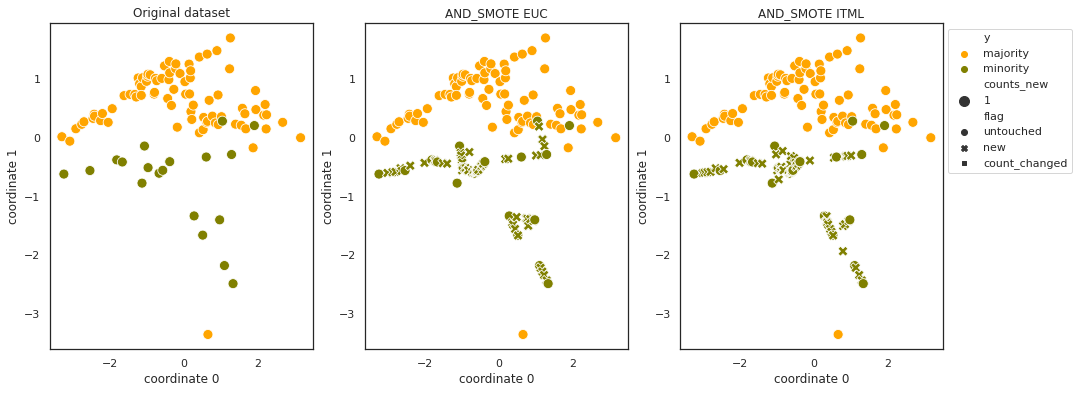

/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:775: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_dist = np.array(results_dist)
/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:776: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_ind = np.array(results_ind)


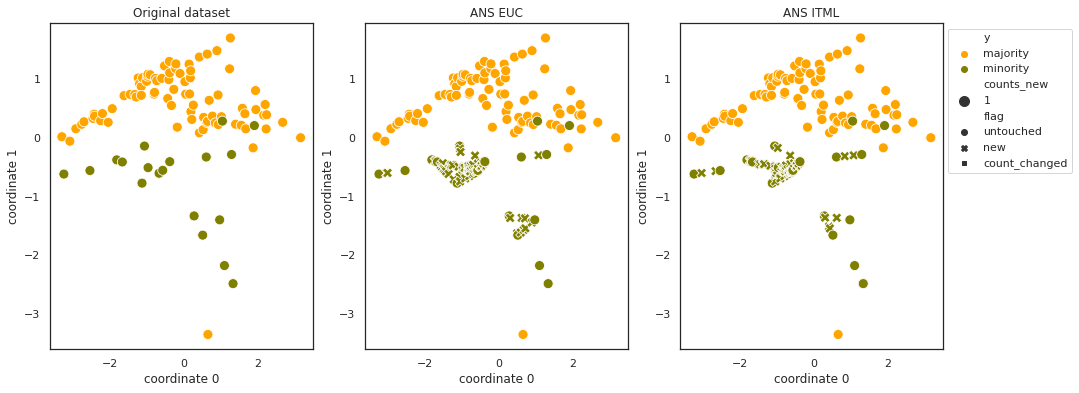

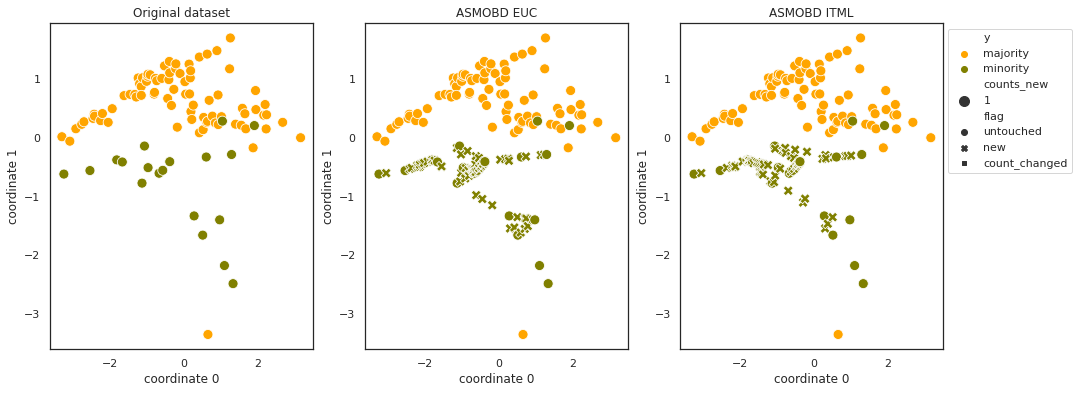

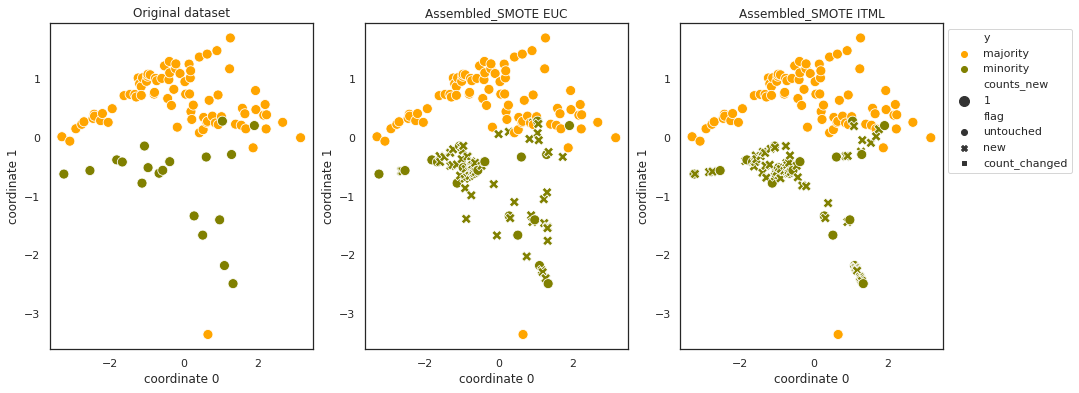

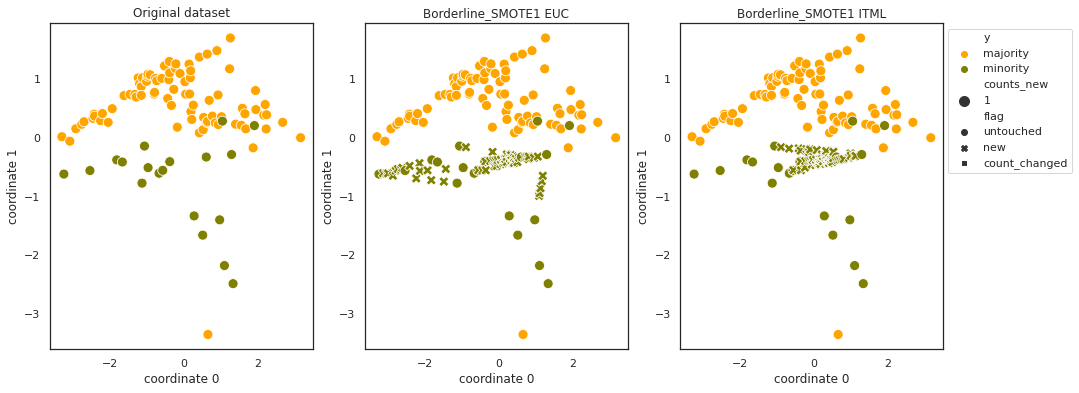

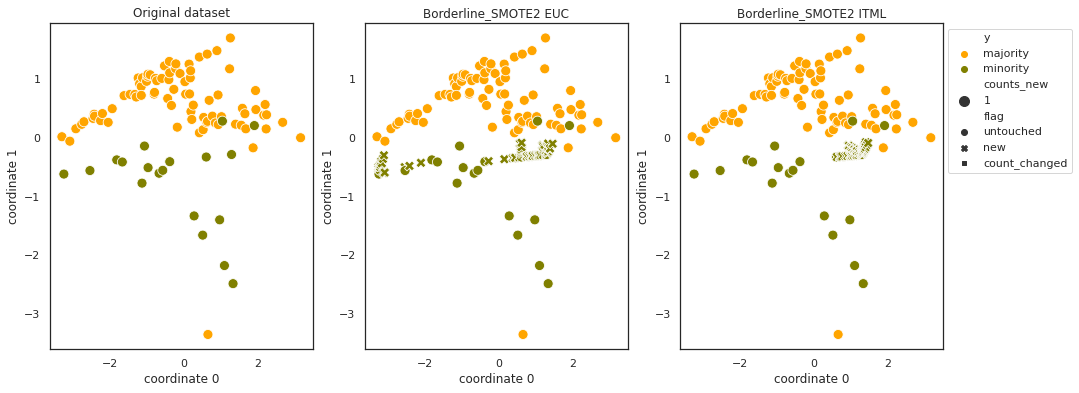

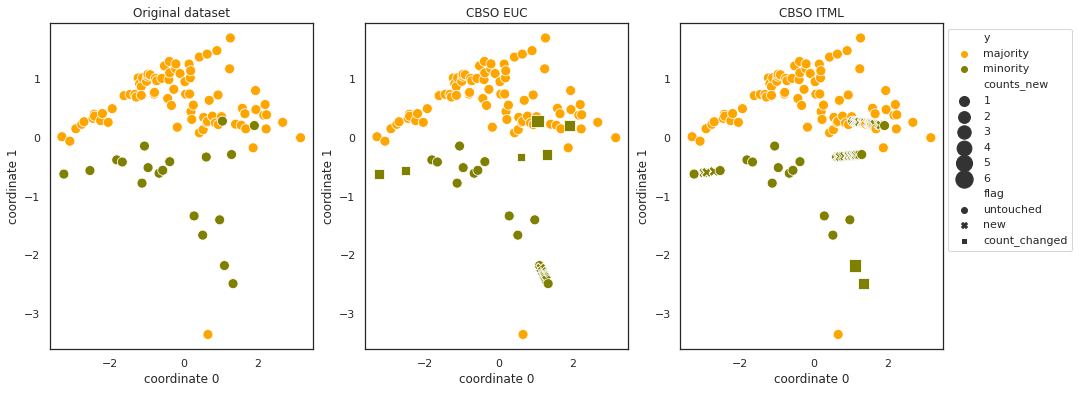

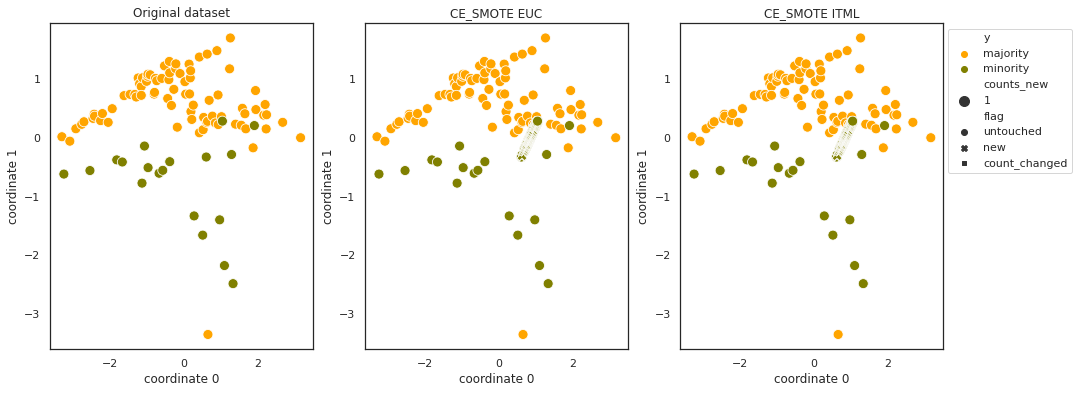

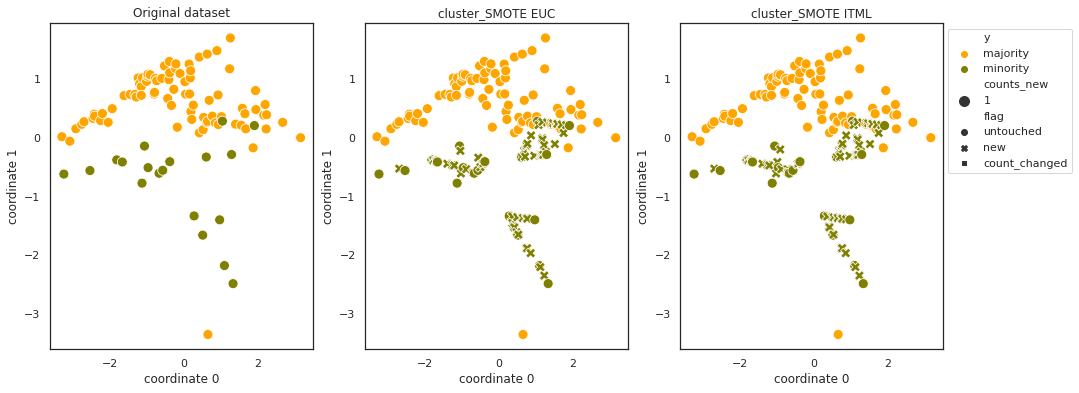

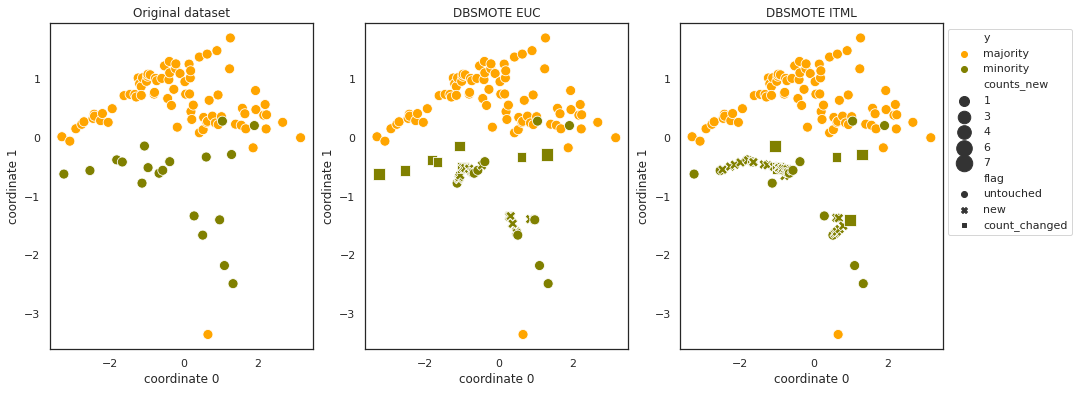

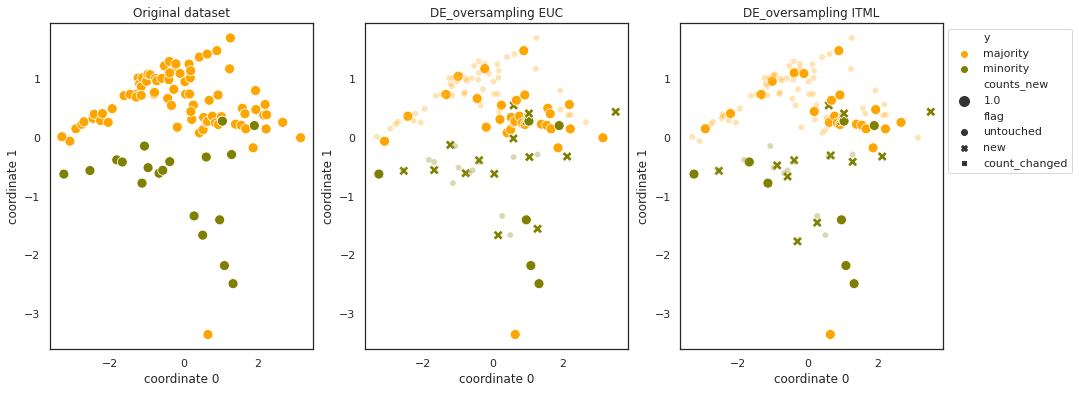

2022-08-13 21:33:10.672329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-13 21:33:10.672888: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 21:33:10.672937: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daa): /proc/driver/nvidia/version does not exist
2022-08-13 21:33:10.675926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 2ms/step


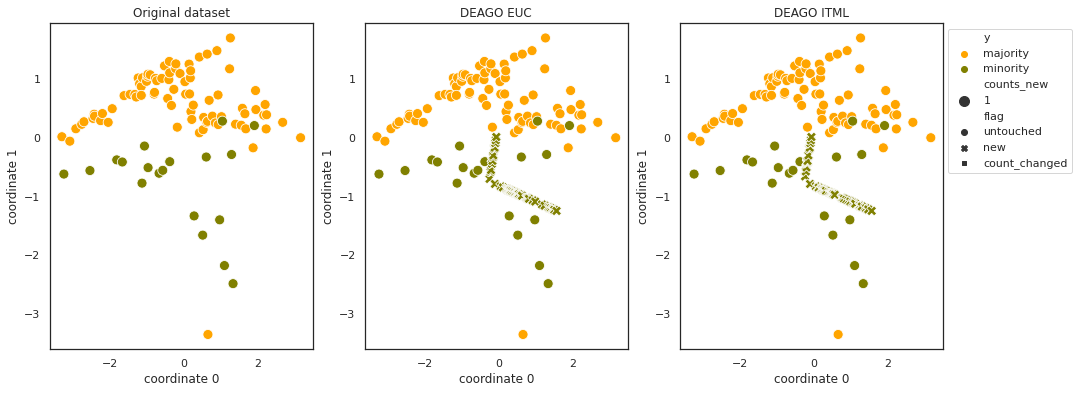

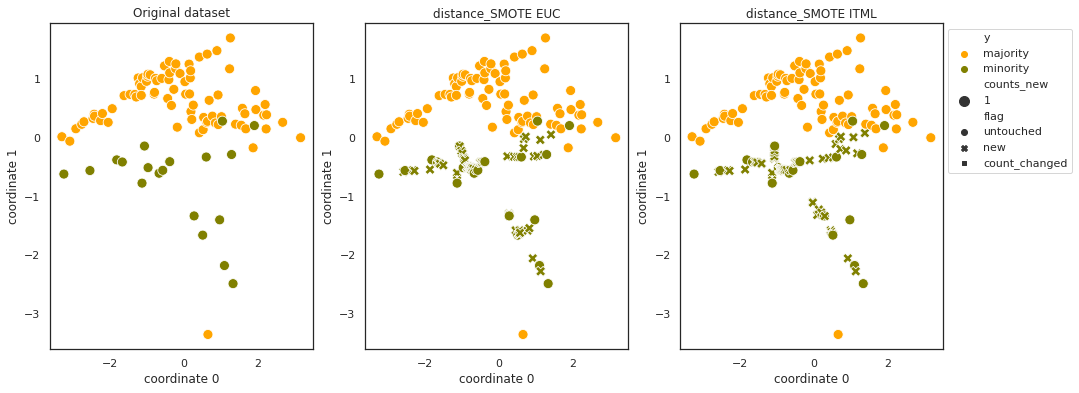

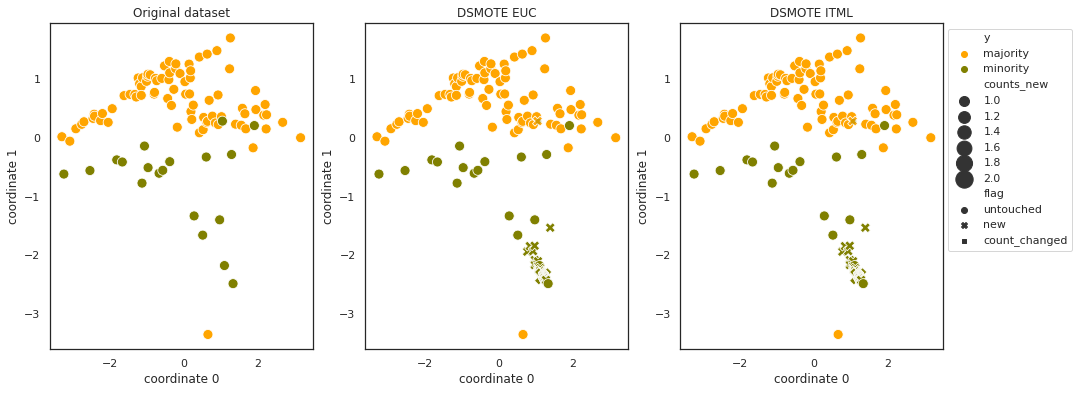

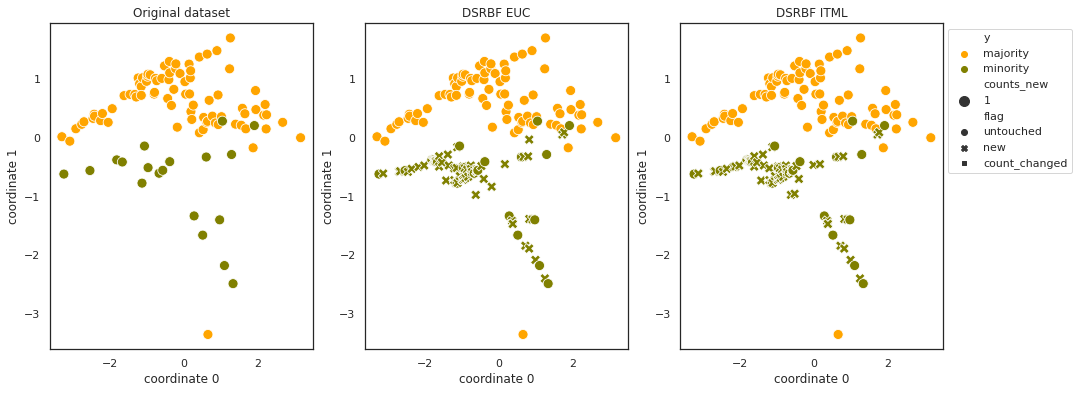

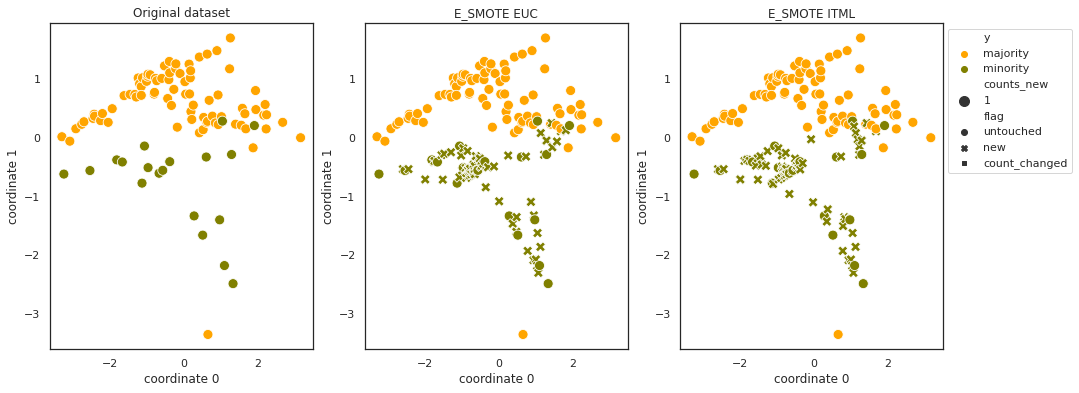

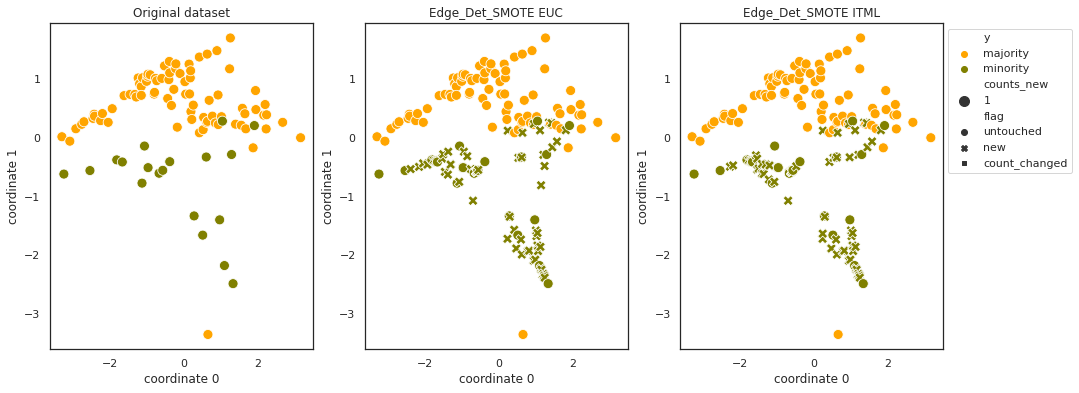

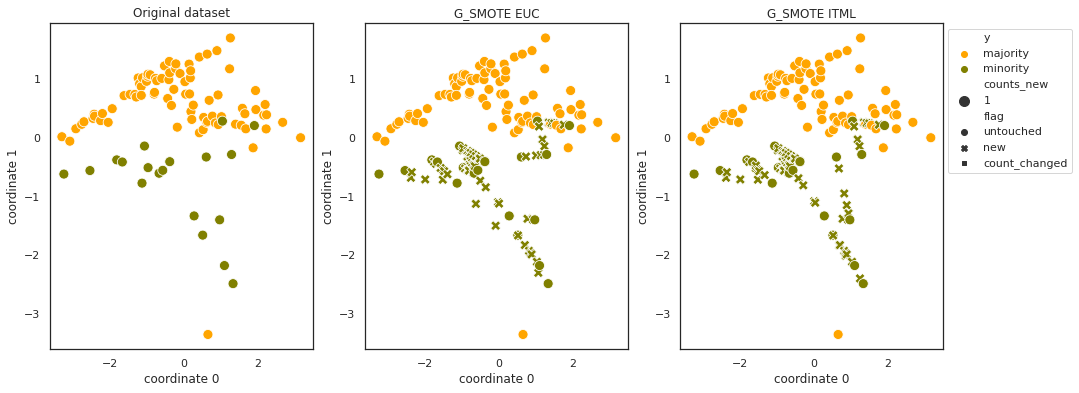

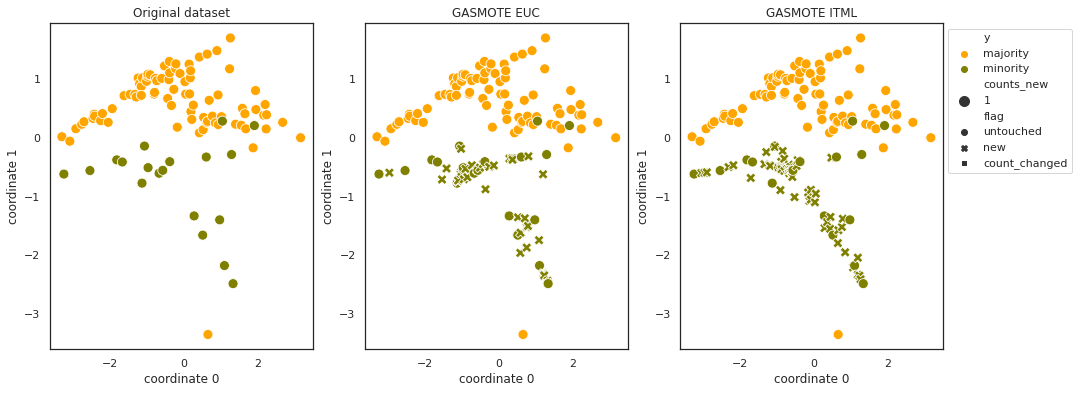

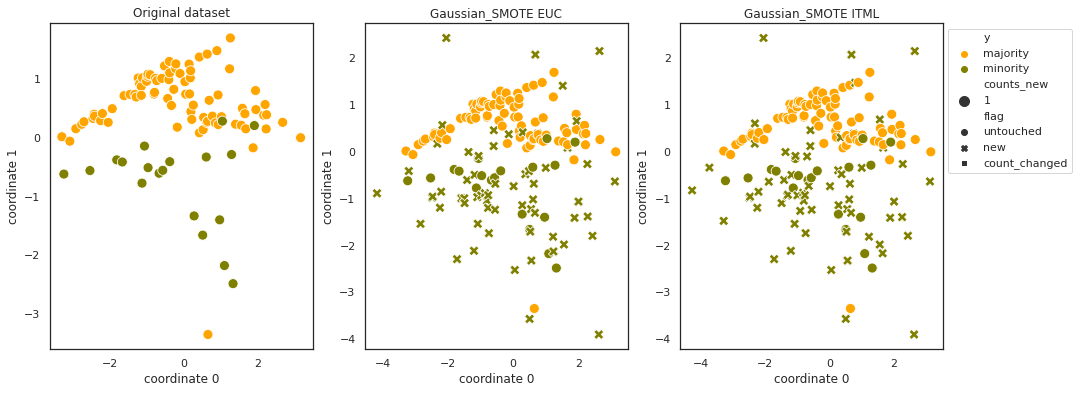

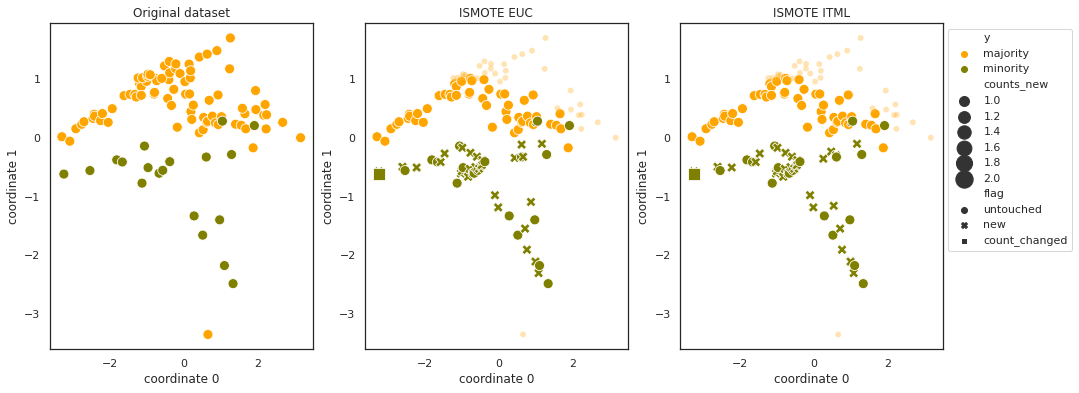

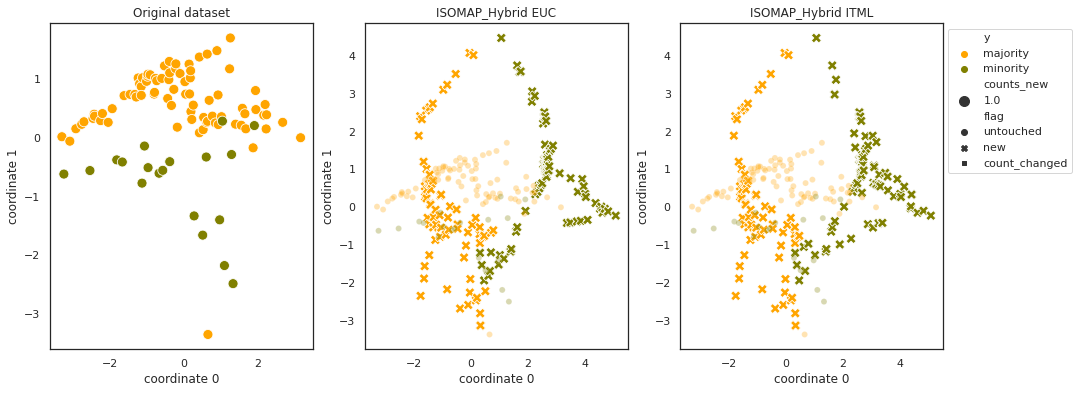

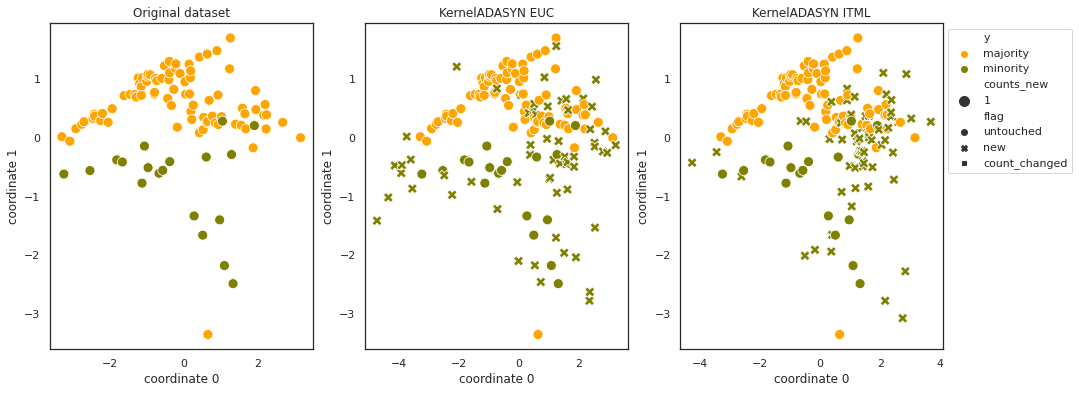

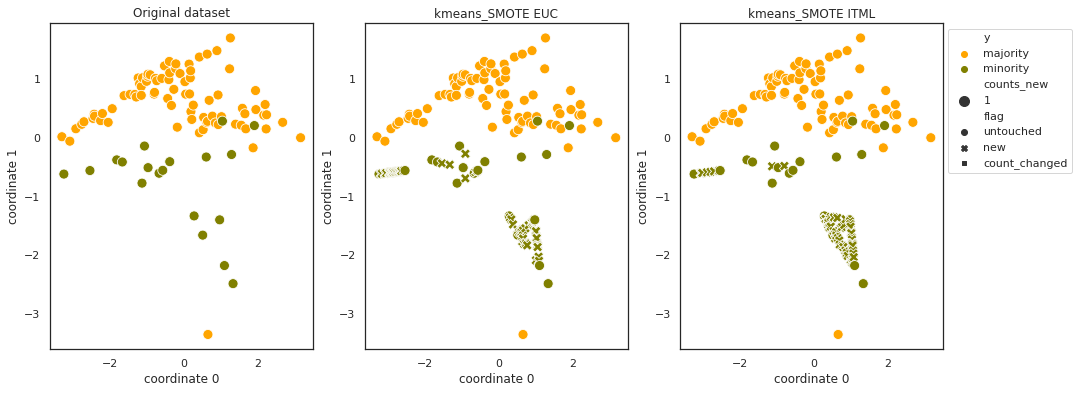

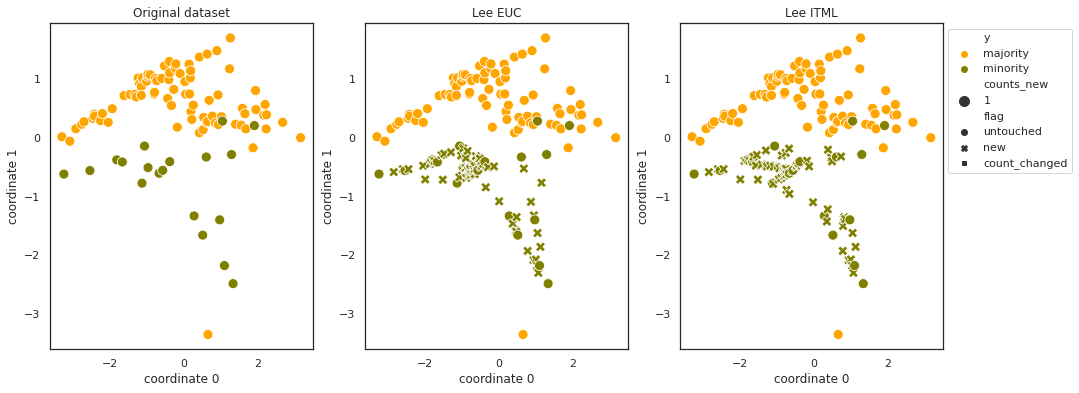

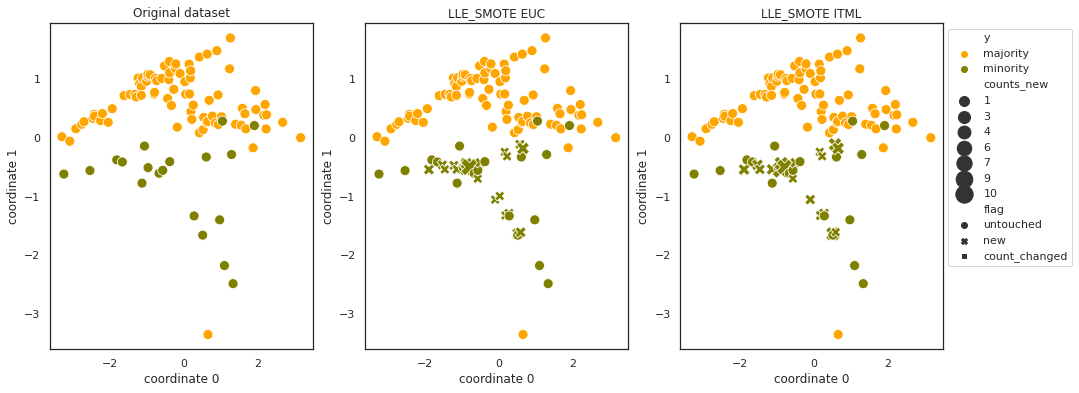

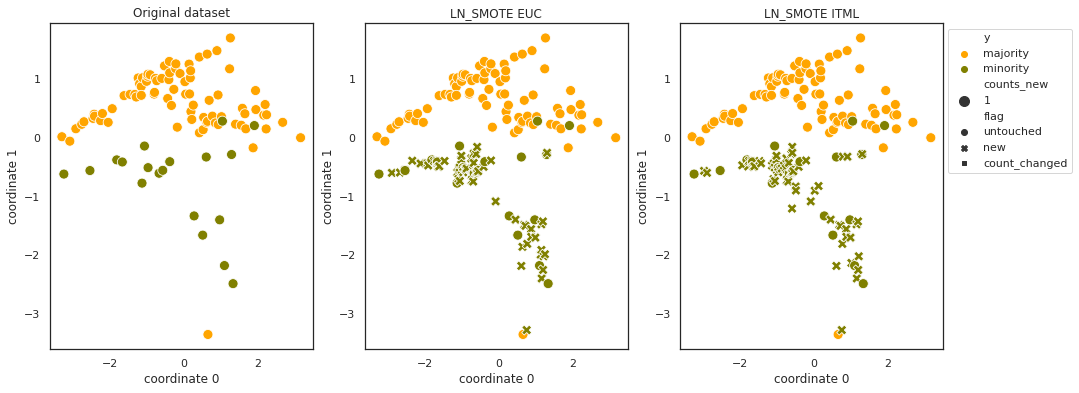

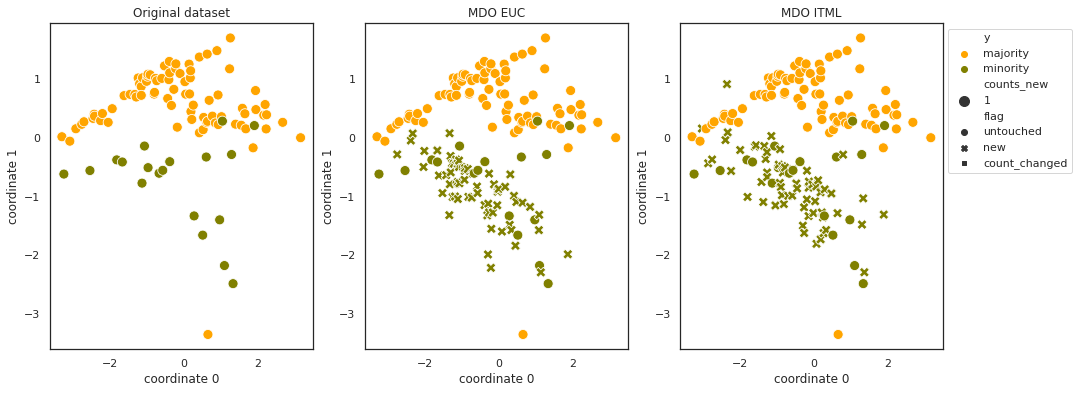

/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:775: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_dist = np.array(results_dist)
/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:776: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_ind = np.array(results_ind)


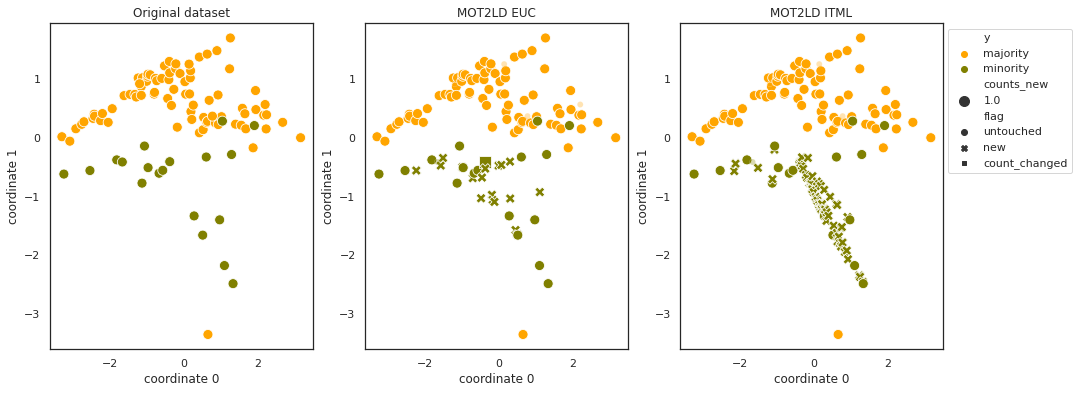

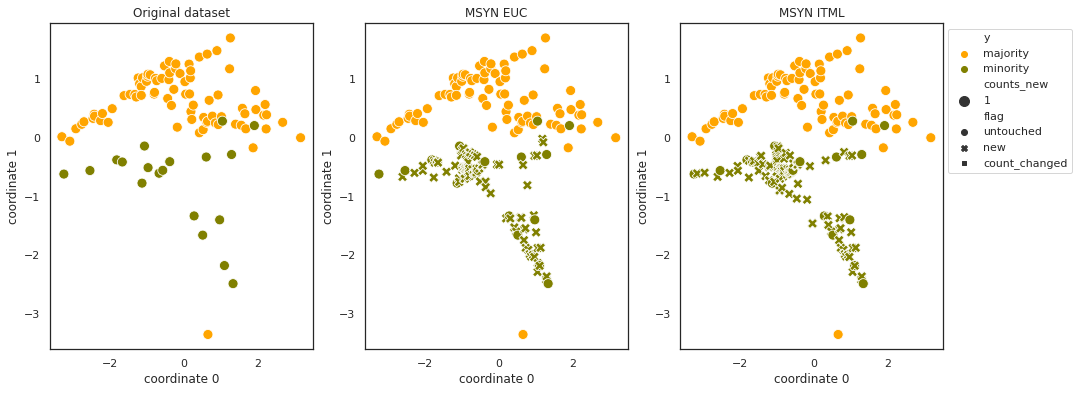

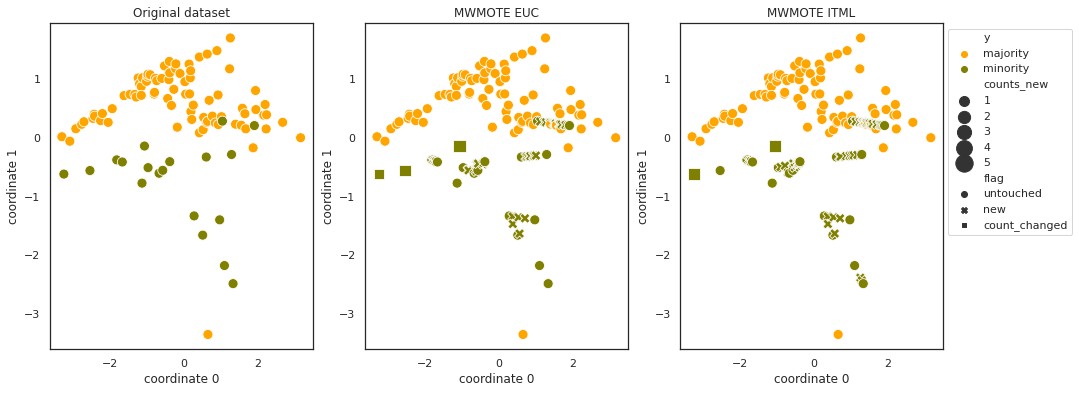

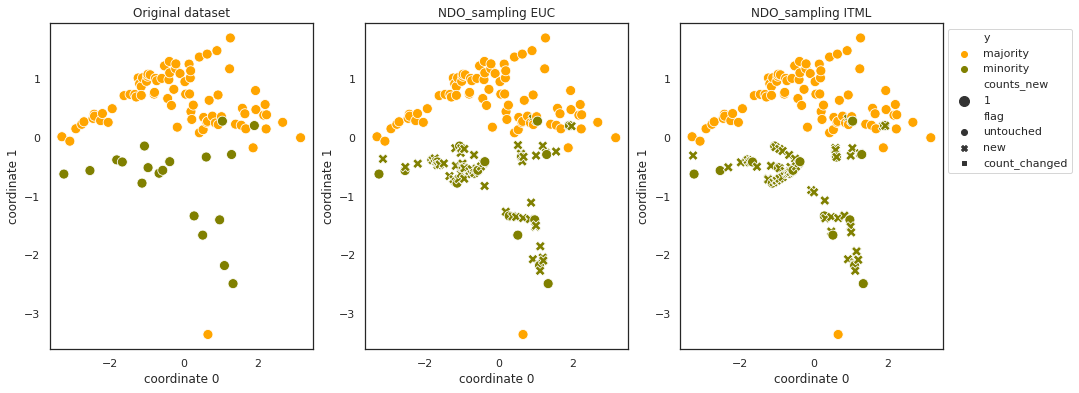

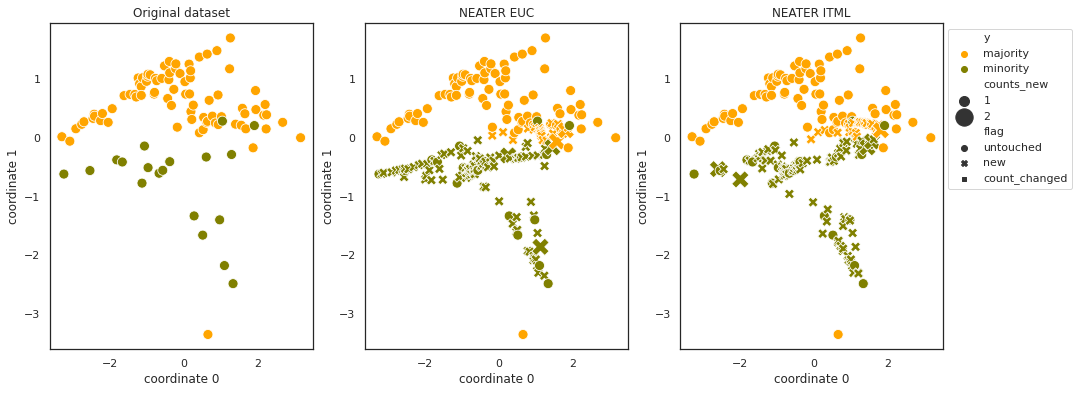

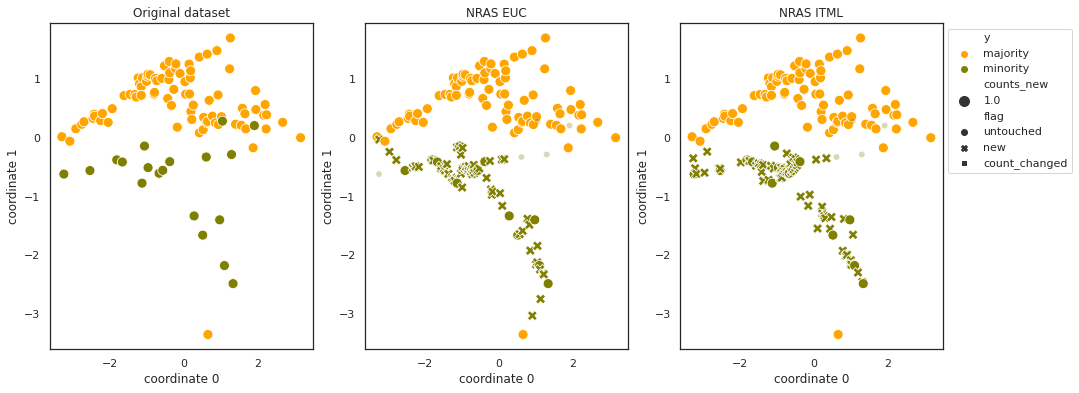

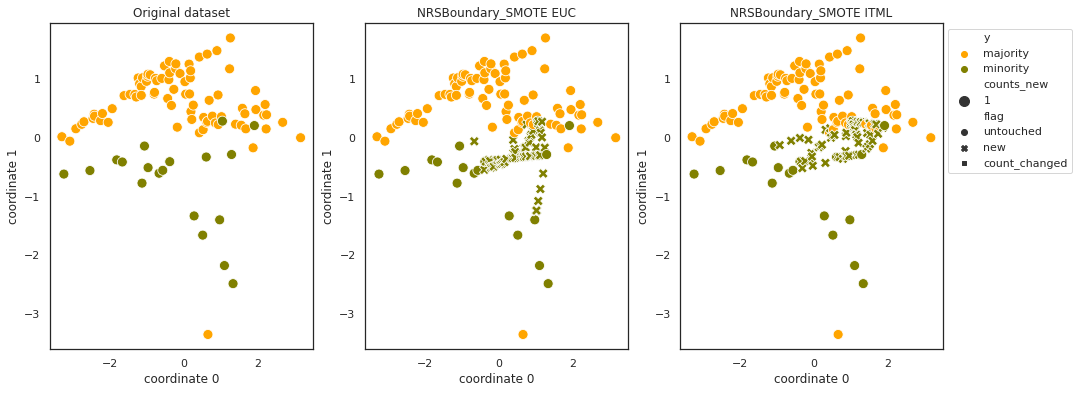

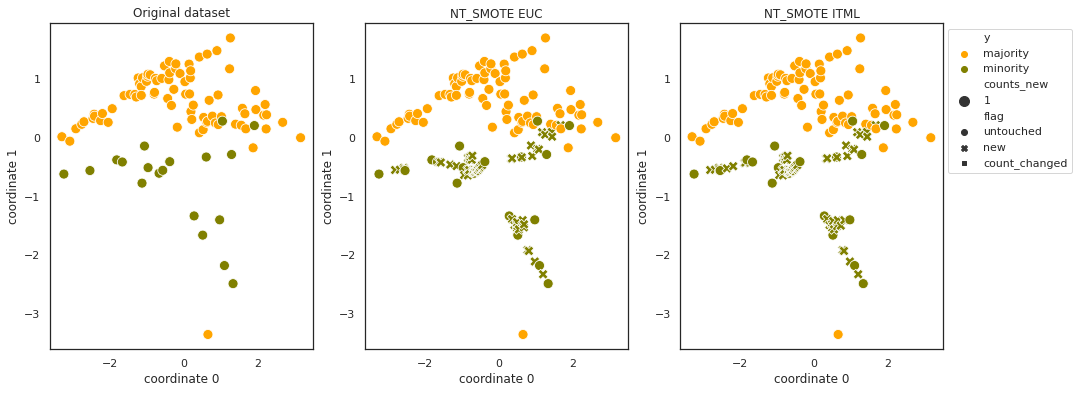

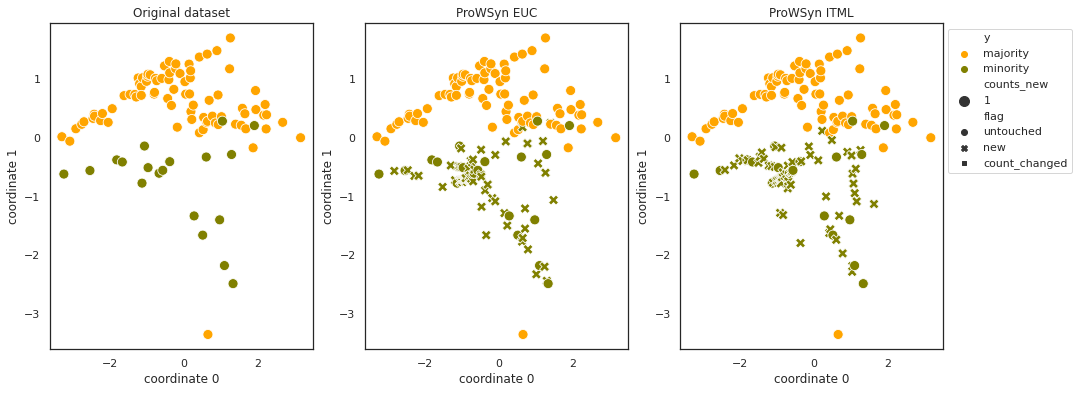

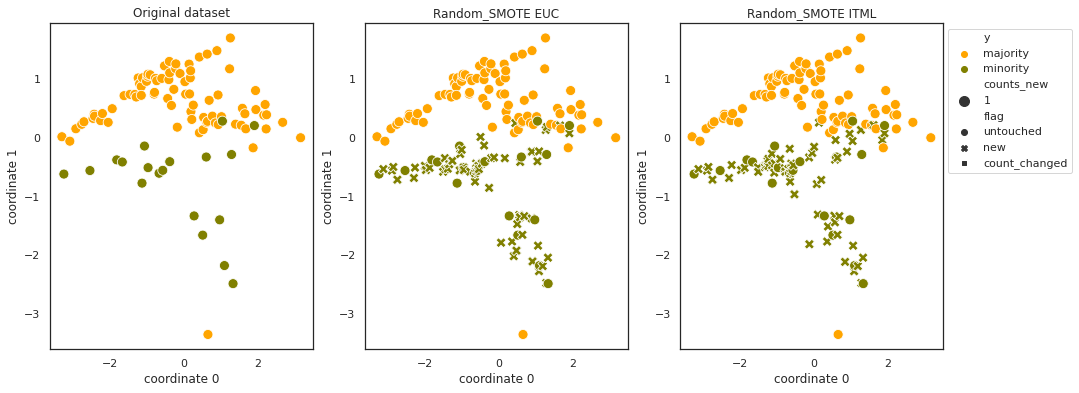

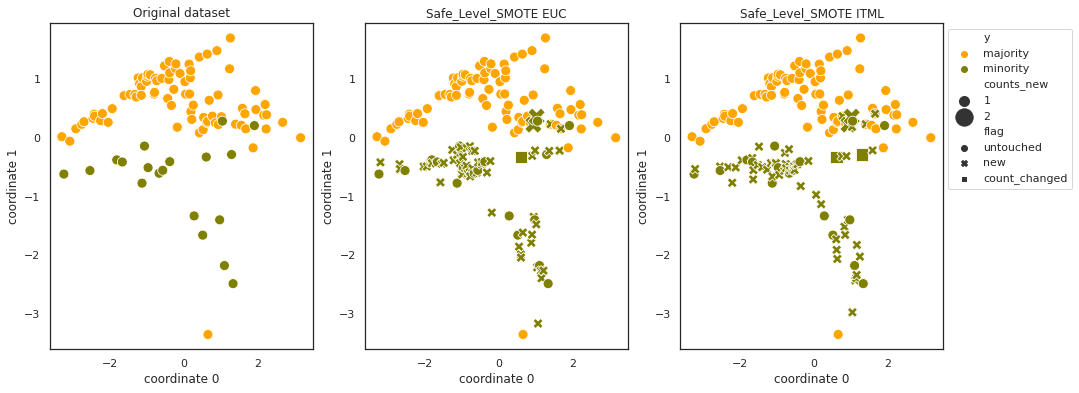

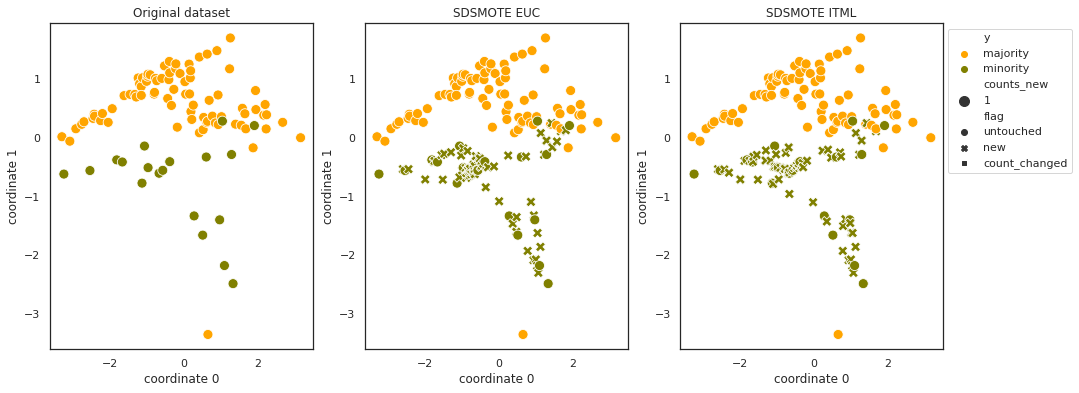

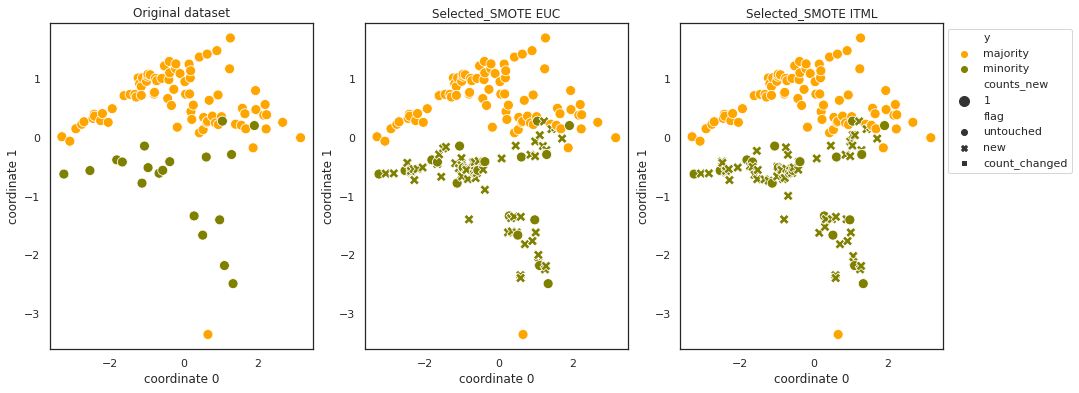

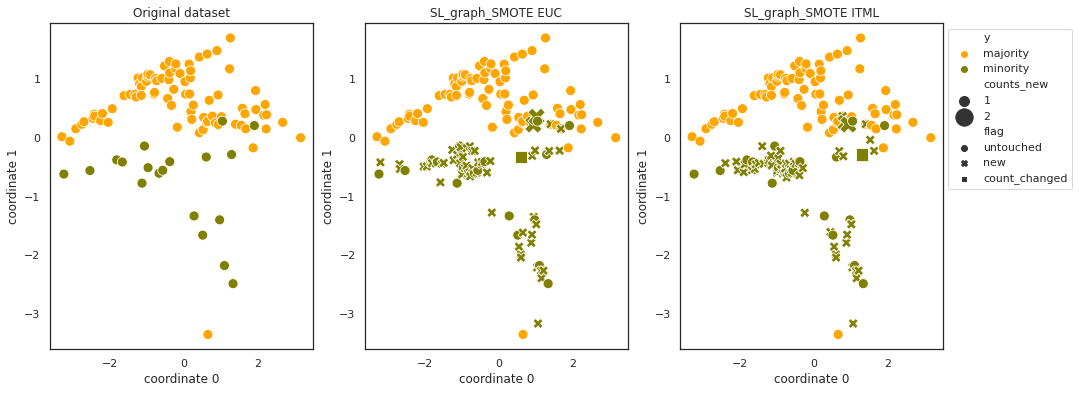

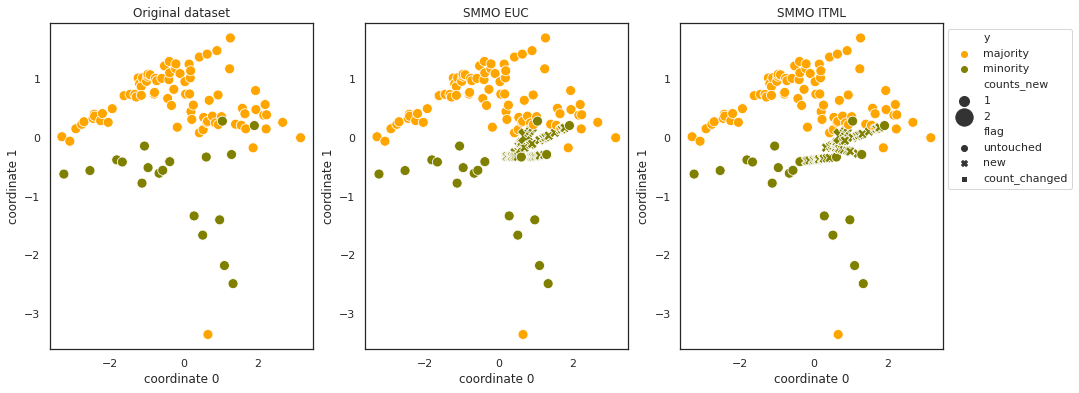

/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:775: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_dist = np.array(results_dist)
/home/gykovacs/workspaces/smote_variants/smote_variants/base/_metrictensor.py:776: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_ind = np.array(results_ind)


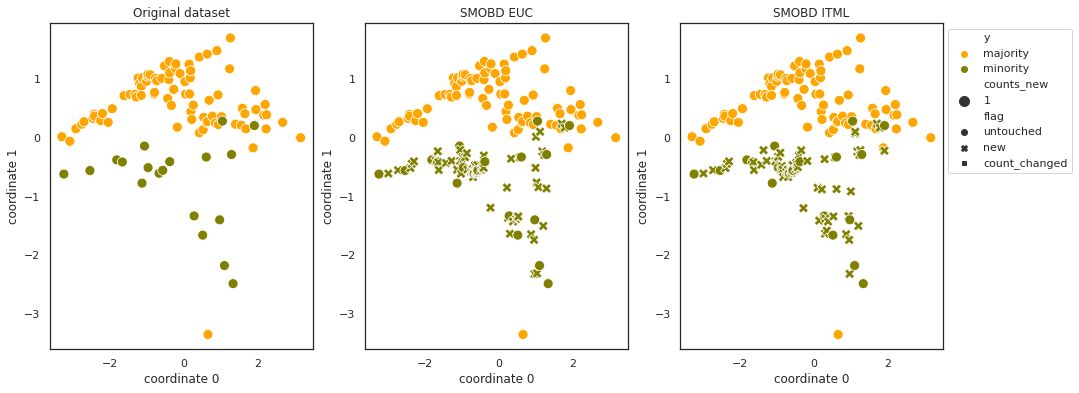

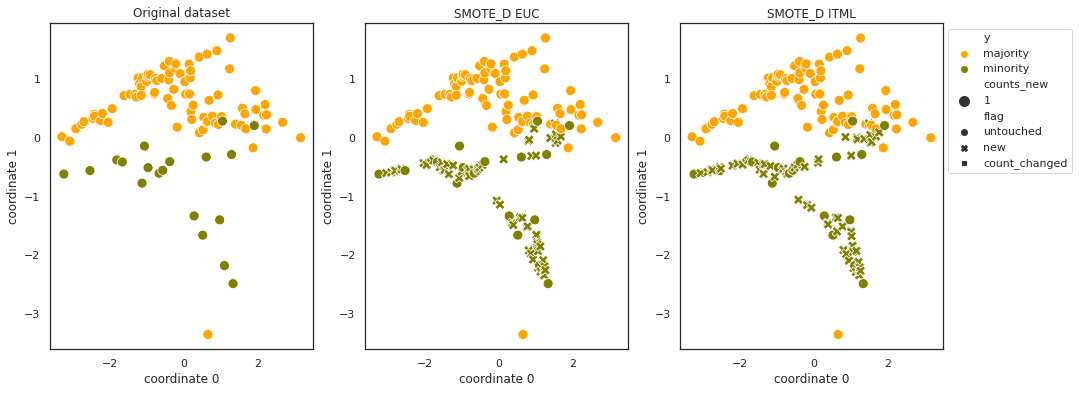

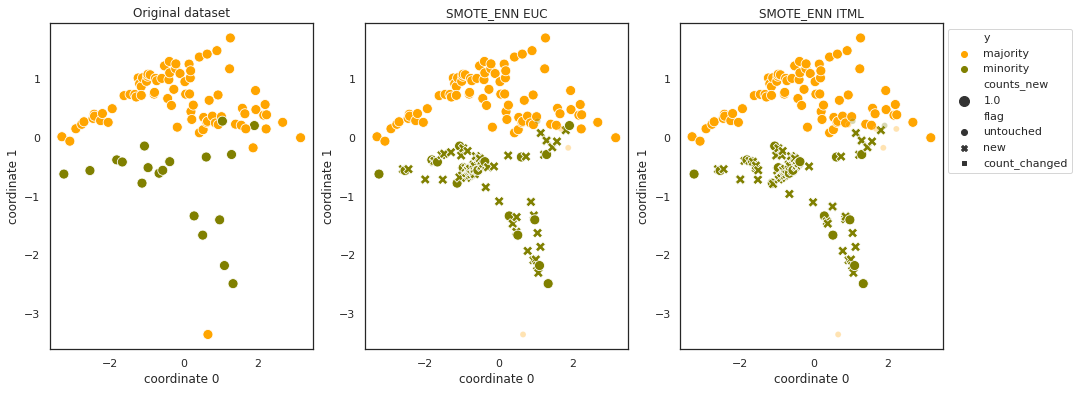

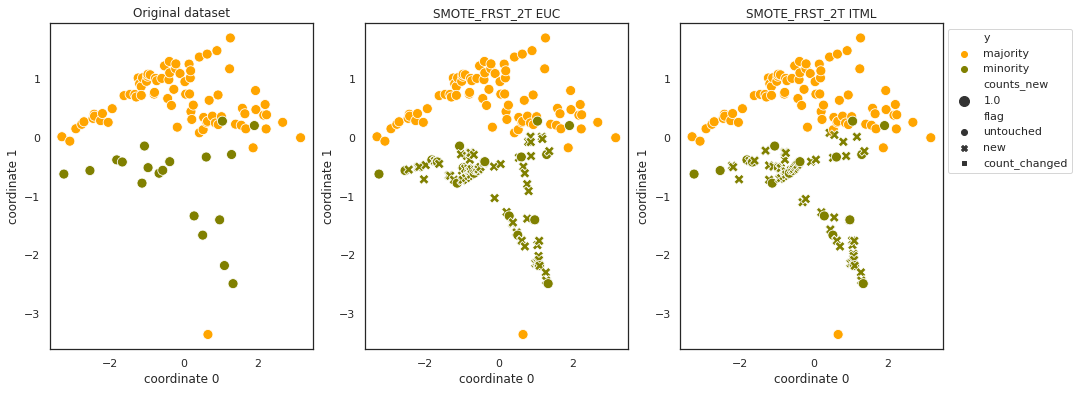

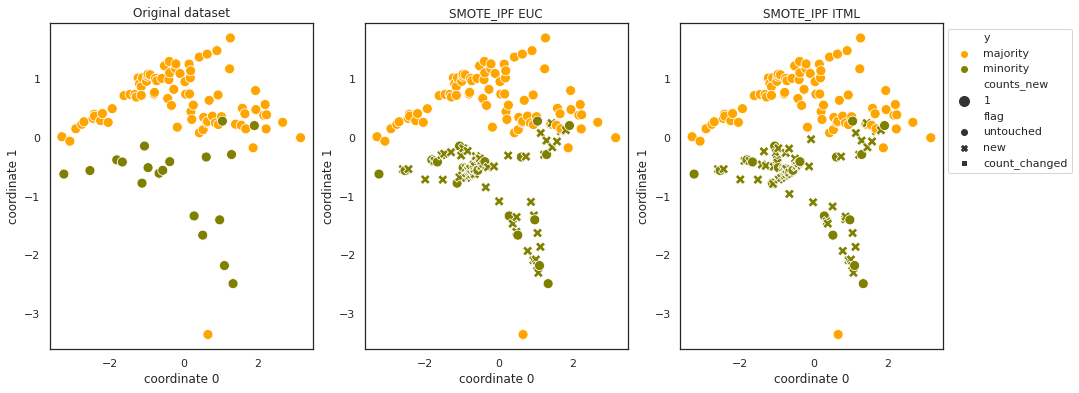

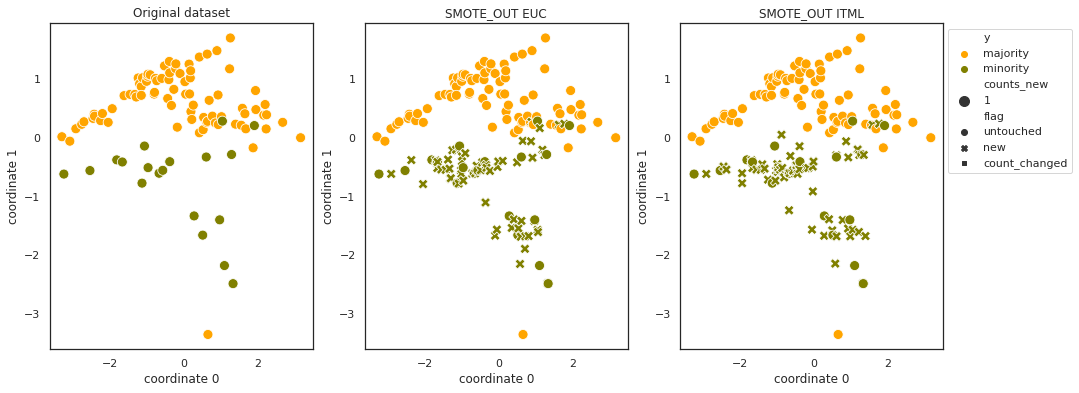

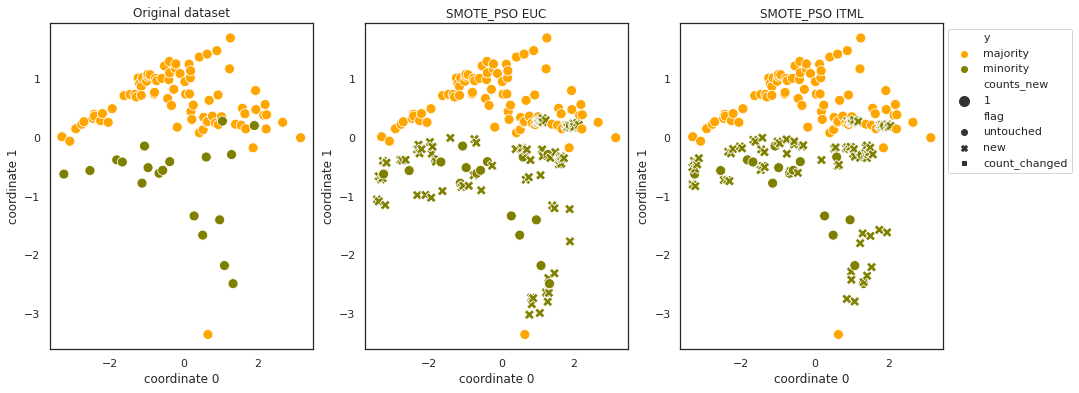

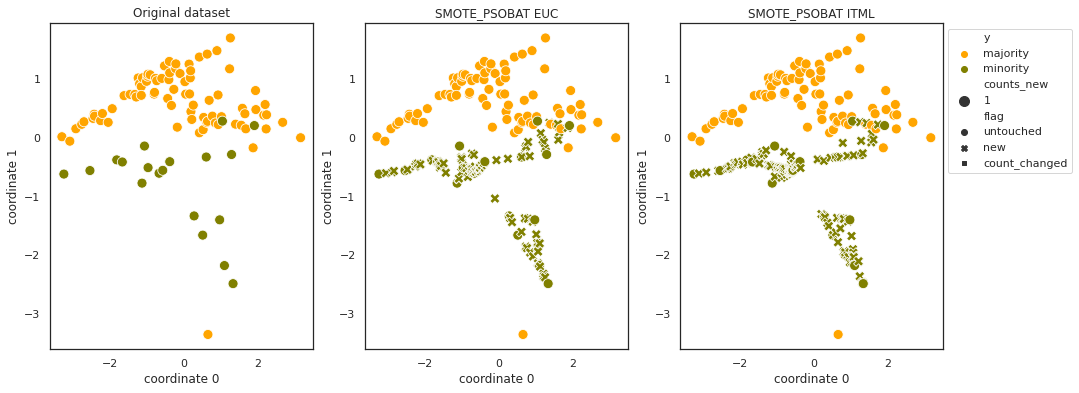

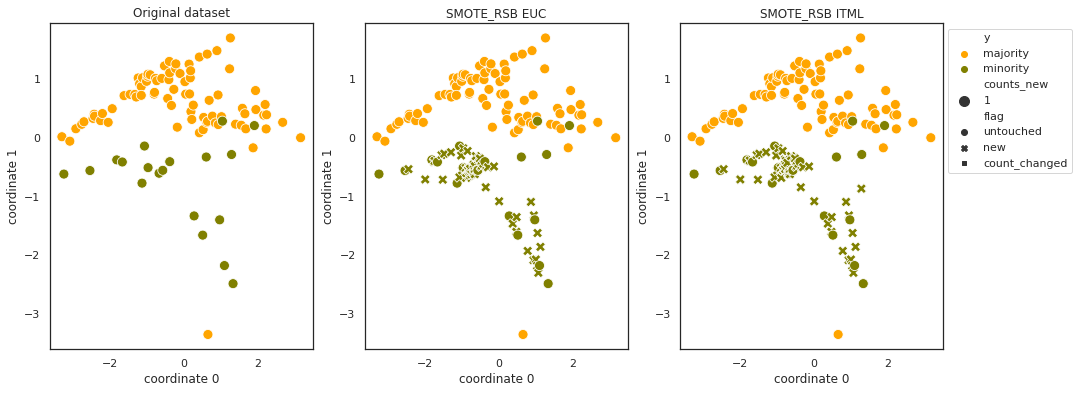

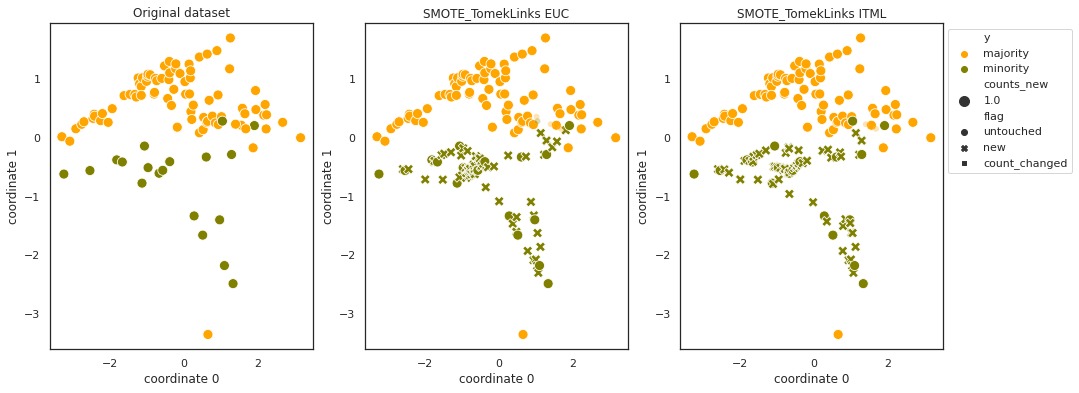

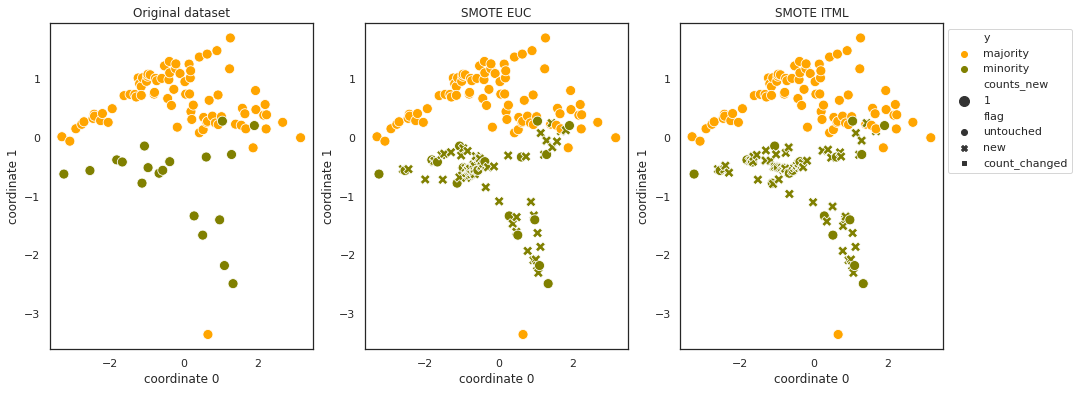

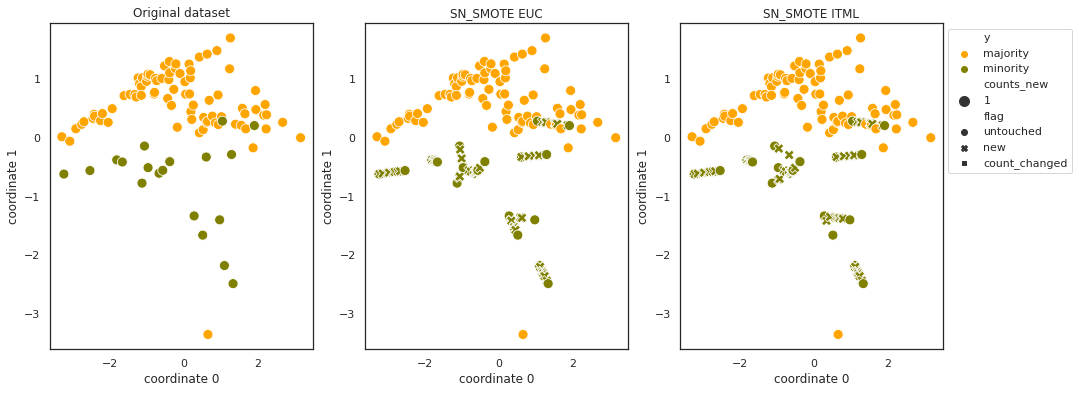

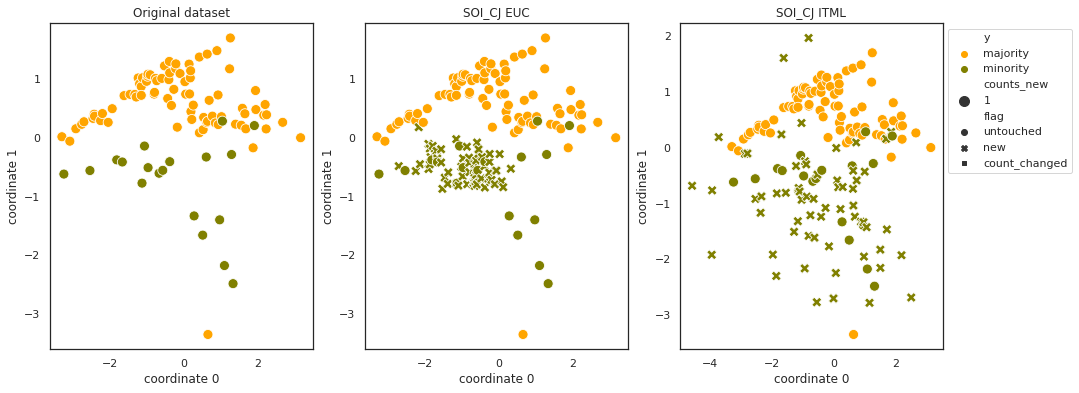

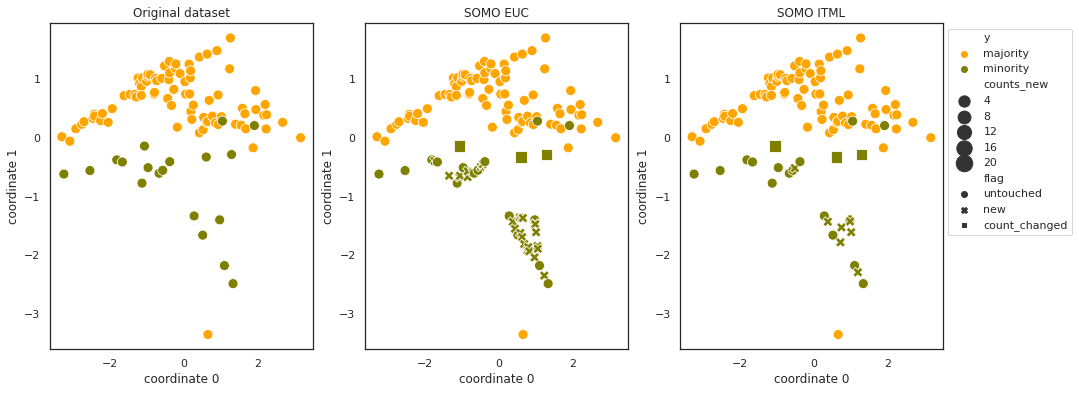

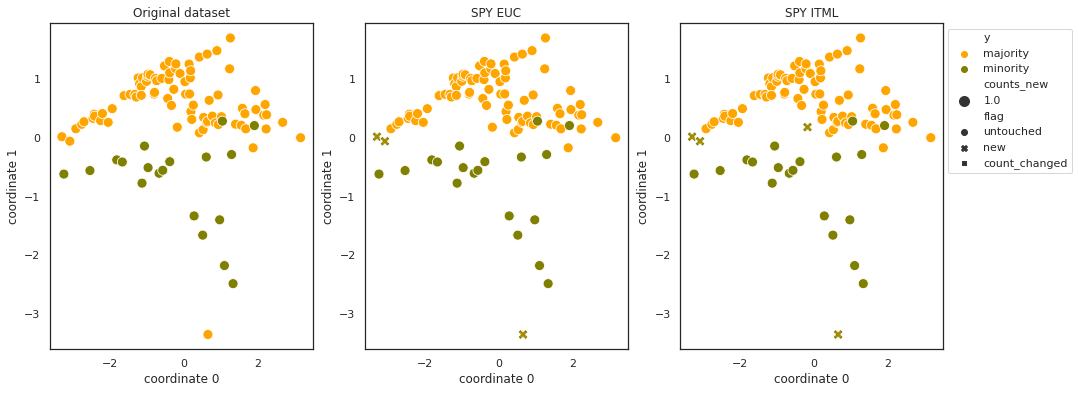

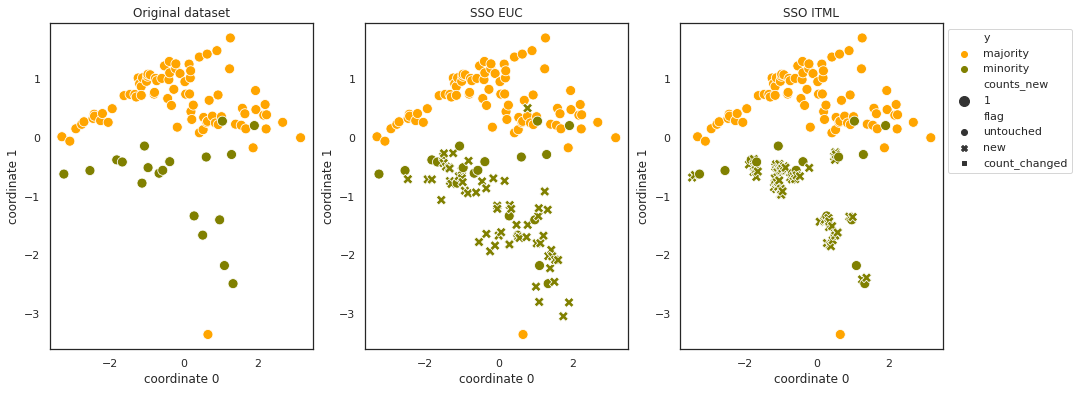

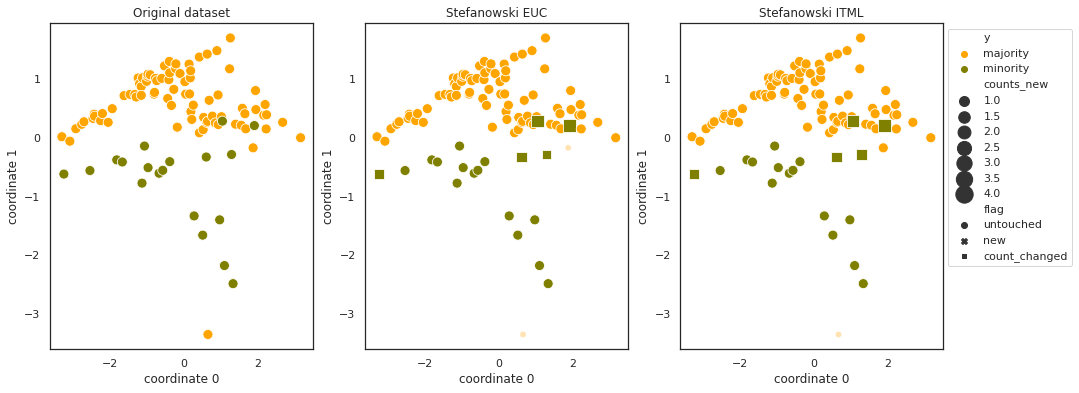

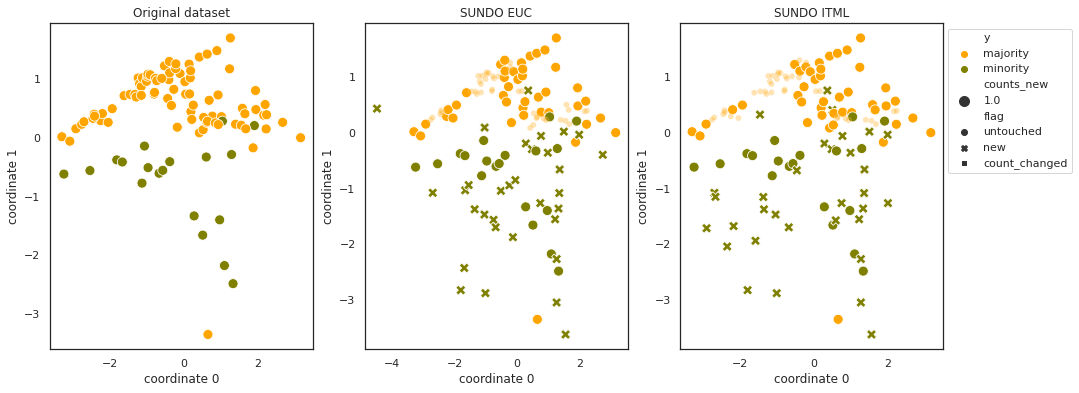

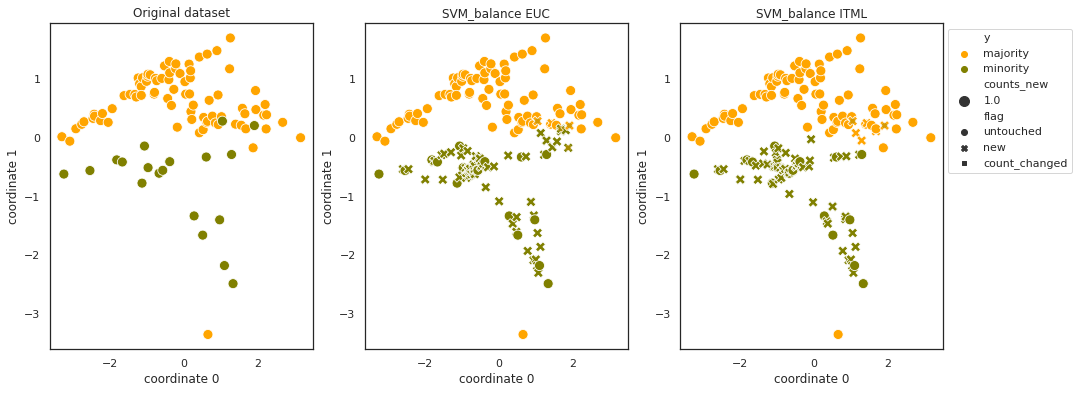

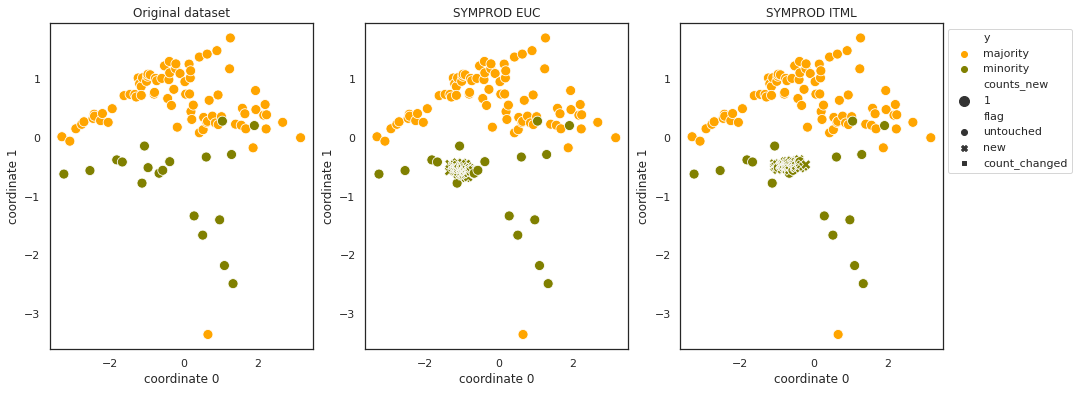

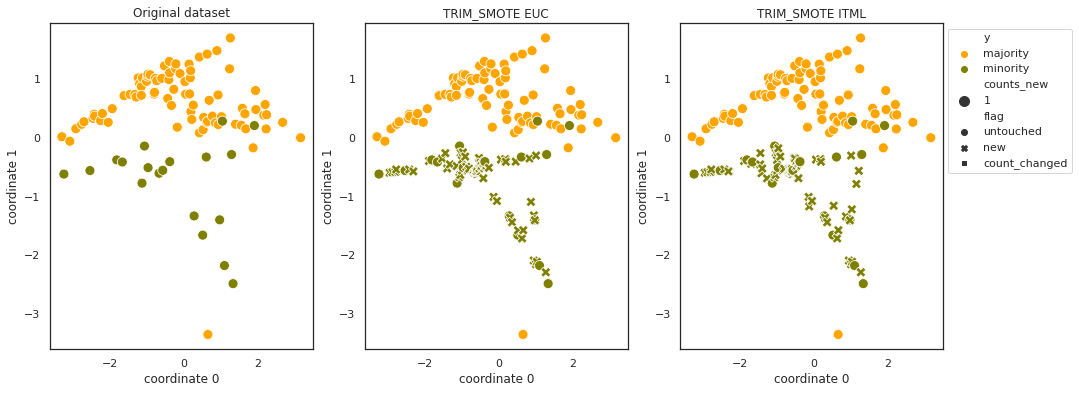

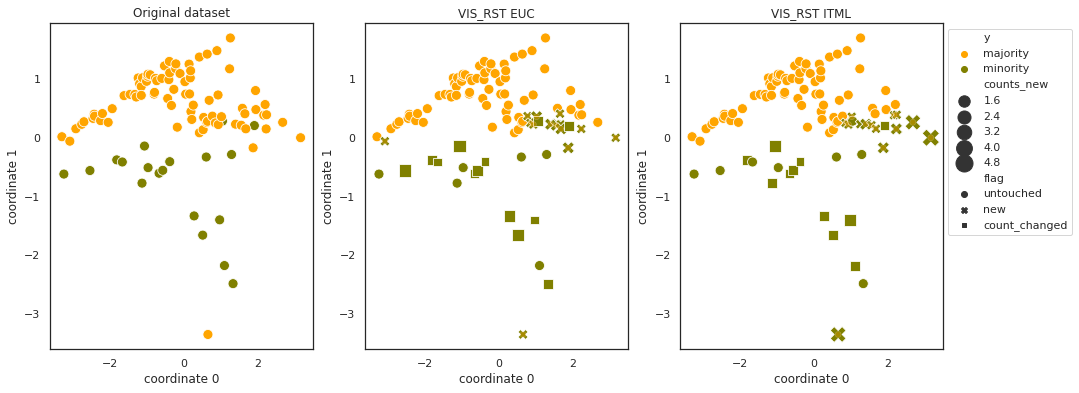

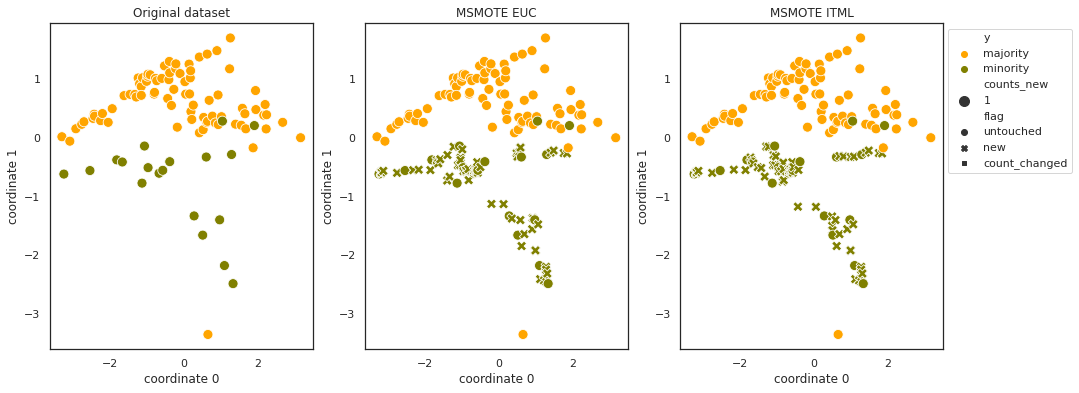

In [8]:
for o in oversamplers:
    oversampler= o(random_state=13)
    X_samp0, y_samp0 = oversampler.sample(X, y)
    oversampler= o(random_state=13, nn_params={'metric': 'precomputed',
                                                'metric_learning_method': 'ITML'})
    X_samp1, y_samp1 = oversampler.sample(X, y)
    
    fig = sv.visualization.plot_comparison_raw(X=X, y=y, 
                                            X_samp0=X_samp0, 
                                            y_samp0=y_samp0, 
                                            X_samp1=X_samp1, 
                                            y_samp1=y_samp1, 
                                            title0=o.__name__ + " EUC", 
                                            title1=o.__name__ + " ITML")
    plt.show()
